In [41]:
import argparse
import os
import sys
import networkx as nx
import numpy as np
import pandas as pd
import statistics
import time
import datetime
import subprocess
import matplotlib.pyplot as plt

### concensus: filtering avec theuileur differents

In [37]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/'
files = os.listdir(input_file)
list_path = []
therond='0.4'
for i in files:
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    print(input_file2)
    pd_read=pd.read_csv(input_file2)
    pd2=pd_read[pd_read['ratio'].astype(float)>=float(therond)]
    pd2=pd2[['Node1','Node2','mean_pearson']]
    name=f'{input_file}{i}/multilayer_edges_{therond}.csv'
    pd2.to_csv(name,index=False)

/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class3_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class4_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class4_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class2_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class2_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class3_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class1_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random/class1_male/multilayer_edges_row.csv


### concensus: filtering for negatif

In [48]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/'
files = os.listdir(input_file)
list_path = []
therond='0.7'
for i in files:
    input_file2=f'{input_file}{i}/multilayer_edges_row.csv'
    print(input_file2)
    pd_read=pd.read_csv(input_file2)
    pd_read=pd_read[pd_read['mean_pearson'].astype(float)<0]
    pd_read=pd_read[pd_read['ratio'].astype(float)>=float(therond)]
    pd2=pd_read[pd_read['ratio'].astype(float)>=float(therond)]
    pd2=pd2[['Node1','Node2','mean_pearson']]
    name=f'{input_file}{i}/multilayer_edges_negatif_{therond}.csv'
    pd2.to_csv(name,index=False)

/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class3_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class4_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class4_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class2_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class2_male/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class3_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class1_female/multilayer_edges_row.csv
/home/storage_1/yuping/compute_GCN/result_concensus_hypocampus_10rep_10_sample_random_all/class1_male/m

### table of the

In [3]:
def read_layer(file_layer):
    """
    input : file_layer, the name of a gene co-expression network edge file corresponding to an class
    return : layer, a coexpresson's networkx graph,
    """
    layer = nx.Graph()
    with open(file_layer) as infile:
        for line in infile:
            if line.startswith("Node1"):
                continue
            list_line = line.rstrip().split(',')
            # if float(list_line[2]) > 0.0: #only positive corellation of coexpression are take in account
            # node1, node2 = tuple(sorted([list_line[0].split(".")[0], list_line[1].split(".")[0]]))
            node1, node2 = tuple(sorted([list_line[0], list_line[1]]))
            cor = list_line[2]
            layer.add_edge(node1, node2, pearson=float(cor))
    return layer

In [183]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_new_methode_random_15_8_0.852/class3_Female/multilayer_edges_0.8.csv'
files = os.listdir(input_file)
input_file2=f'{input_file}multilayer_edges.csv'

In [13]:
input_file='/home/storage_1/yuping/compute_GCN/result_concensus_new_methode_random_15_10_0.852/class3_Female/multilayer_edges_0.8.csv'
x=read_layer(input_file)

In [14]:
x.number_of_edges()

772324

In [15]:
x.number_of_nodes()

14685

In [16]:
nx.number_connected_components(x)

596

In [20]:
nx.closeness_centrality(x).values()

dict_values([6.810133478616181e-05, 6.810133478616181e-05, 0.10388502197434699, 0.11779508867301966, 0.1243285194381144, 0.10893346673781638, 0.1225874641114268, 0.13469696703875375, 0.12634130991469658, 0.12647209074149518, 0.1342085425740356, 0.13366072682932975, 0.12861803912532999, 0.13028300233317835, 0.1314952037181395, 0.1273409396894335, 0.13049846732537987, 0.13129615733965183, 0.1203069663249034, 0.13226204223592306, 0.12588500197744512, 0.12573177586518117, 0.00013620266957232362, 0.00013620266957232362, 0.00013620266957232362, 0.12748238041184493, 0.13628834678894772, 0.13977724530991317, 0.10851007065356587, 0.12377729657717569, 0.1232870974403037, 0.11827450867584209, 0.1388905029762639, 0.1281625126721576, 0.13730613684520568, 0.12473524105306773, 0.1296349391163609, 0.13818950499833565, 6.810133478616181e-05, 6.810133478616181e-05, 0.11918261394709509, 0.12053541019739628, 0.12306943850106851, 0.11862890125062016, 0.1143697236888591, 0.13155762473646118, 0.1060105244111

In [52]:
statistics.variance(dict_closeness.values())

0.020397884663812645

In [7]:
nx.average_clustering(x)

NameError: name 'x' is not defined

In [19]:
nx.diameter(x)

NetworkXError: Found infinite path length because the graph is not connected

In [63]:
nx.average_shortest_path_length(x)

NetworkXError: Graph is not connected.

In [38]:
list_degree=nx.degree_histogram(x)

In [ ]:
list_degre=

In [18]:
for C in (x.subgraph(c).copy() for c in nx.connected_components(x)):
    print(nx.diameter(C))
    print(nx.average_shortest_path_length(C))

1
1.0


KeyboardInterrupt: 

In [17]:
liste_empty=[x.number_of_edges(),x.number_of_nodes(),nx.number_connected_components(x),statistics.mean(nx.closeness_centrality(x).values()),nx.average_clustering(x),nx.diameter(x),nx.average_shortest_path_length(x)]

In [182]:
liste_empty

[4183000, 10135, 113, 0.6553927962593294, 23, 5.565945121386173]

### dataframe

In [1]:
df_empty=pd.DataFrame(columns=['number_of_edges','number_of_nodes','number_connected_components','average_clustering_coefficient','diameter', 'average_shortest_path_length'])

NameError: name 'pd' is not defined

In [50]:
df_empty=pd.DataFrame(columns=['number_of_edges','number_of_nodes','number_connected_components','average_clustering_coefficient'])

In [12]:
1000*999/2

499500.0

In [43]:
input_file='/home/storage_1/yuping/compute_GCN/blood/'
df_empty=pd.DataFrame(columns=['number_of_edges','number_of_nodes','number_connected_components','average_clustering_coefficient','diameter', 'average_shortest_path_length'])
files = os.listdir(input_file)
list_path = []
for i in files:
    print(i)
    df_empty.loc[i]='NA'
    input_file2=f'{input_file}{i}/multilayer_edges_1.csv'
    print(input_file2)
    x=read_layer(input_file2)
    df_empty.loc[i,'number_of_edges']=x.number_of_edges()
    print(x.number_of_edges())
    df_empty.loc[i,'number_of_nodes']=x.number_of_nodes()
    print(x.number_of_nodes())
    df_empty.loc[i,'number_connected_components']=nx.number_connected_components(x)
    print(nx.number_connected_components(x))
    df_empty.loc[i,'average_clustering_coefficient']=nx.average_clustering(x)
    print(nx.average_clustering(x))

30-39_male
/home/storage_1/yuping/compute_GCN/blood/30-39_male/multilayer_edges_1.csv
17256
5060
639
0.19622693292898594
60-69_male
/home/storage_1/yuping/compute_GCN/blood/60-69_male/multilayer_edges_1.csv
8509
5217
1103
0.256046658441537
20-29_male
/home/storage_1/yuping/compute_GCN/blood/20-29_male/multilayer_edges_1.csv
9096
3547
644
0.16599808445420455
50-59_male
/home/storage_1/yuping/compute_GCN/blood/50-59_male/multilayer_edges_1.csv
67146
8743
991
0.2985662067498037
40-49_male
/home/storage_1/yuping/compute_GCN/blood/40-49_male/multilayer_edges_1.csv
27460
5896
838
0.2380475016433925
70-79_male
/home/storage_1/yuping/compute_GCN/blood/70-79_male/multilayer_edges_1.csv
5570
3383
539
0.150204409677557


In [7]:
input_file='/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/'
df_empty=pd.DataFrame(columns=['number_of_edges','number_of_nodes','number_connected_components','average_clustering_coefficient','diameter', 'average_shortest_path_length'])
files = os.listdir(input_file)
list_path = []
for i in files:
    print(i)
    df_empty.loc[i]='NA'
    input_file2=f'{input_file}{i}/multilayer_edges_1.csv'
    print(input_file2)
    x=read_layer(input_file2)
    df_empty.loc[i,'number_of_edges']=x.number_of_edges()
    print(x.number_of_edges())
    df_empty.loc[i,'number_of_nodes']=x.number_of_nodes()
    print(x.number_of_nodes())
    df_empty.loc[i,'number_connected_components']=nx.number_connected_components(x)
    print(nx.number_connected_components(x))
    df_empty.loc[i,'average_clustering_coefficient']=nx.average_clustering(x)
    print(nx.average_clustering(x))

class3_male
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class3_male/multilayer_edges_1.csv
16350
5634
1389
0.22600725174137784
class4_male
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class4_male/multilayer_edges_1.csv
42519
9447
1310
0.24184343863831856
class4_female
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class4_female/multilayer_edges_1.csv
129796
10700
998
0.2977453604102933
class5_female
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class5_female/multilayer_edges_1.csv
8131
6022
1605
0.1740530190684202
class8_male
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class8_male/multilayer_edges_1.csv
158359
9062
1039
0.26244021527888617
class2_female
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class2_female/multilayer_edges_1.csv
8557
6838
1534
0.1366495224251039
class6_female
/home/storage_1/yuping/compute_GCN/hypo_newclass_ratio1/class6_female/multilayer_edges_1.csv
9881
6665
1419
0.17205807159834516
class2_male
/ho

In [44]:
df_empty

,number_of_edges,number_of_nodes,number_connected_components,average_clustering_coefficient,diameter,average_shortest_path_length
30-39_male,17256,5060,639,0.196227,NA,NA
60-69_male,8509,5217,1103,0.256047,NA,NA
20-29_male,9096,3547,644,0.165998,NA,NA
50-59_male,67146,8743,991,0.298566,NA,NA
40-49_male,27460,5896,838,0.238048,NA,NA
70-79_male,5570,3383,539,0.150204,NA,NA


In [7]:
repetition=20

In [ ]:
for i in range(1:repetition):
    print(i)

In [15]:
df_empty

,number_of_edges,number_of_nodes,number_connected_components,average_clustering_coefficient,diameter,average_shortest_path_length
class3_male,123029,3114,484,0.455278,NA,NA
class4_male,40952,4976,596,0.2865,NA,NA
class4_female,144337,7048,476,0.369177,NA,NA
class2_female,24903,4618,627,0.265273,NA,NA
class2_male,7887,3512,586,0.176706,NA,NA
class3_female,55135,4095,618,0.326254,NA,NA
class1_female,9829,2894,649,0.254246,NA,NA
class1_male,3060,2344,586,0.190802,NA,NA
class5_male,49524,5438,589,0.302381,NA,NA


In [161]:
files2=['class1_Female_0.85_0.7','class4_Female_0.85_0.7']

In [45]:
df_empty.to_csv("blood.csv")

In [ ]:
input_file='/home/storage_1/yuping/compute_GCN/liver_20_0.85/'

### sortir for the netstep

In [50]:
def graph_diameter(variables, relations):
    """
    Compute the graph diameter(s).
    If the graph contains several independent sub graph, returns a list the
    diamater of each of the subgraphs.

    :param variables:
    :param relations:
    :return:
    """
    diams = []
    g = as_networkx_graph(variables, relations)
    components  = (g.subgraph(c).copy() for c in nx.connected_components(g))
    for c in components:
        diams.append(nx.diameter(c))
    return diams 

In [63]:
input_file='/home/storage_1/yuping/compute_GCN/hypo_petiteclass/class4_female/multilayer_edges_1.csv'

In [64]:
g=read_layer(input_file)

In [65]:
print(g)

Graph with 10700 nodes and 129796 edges


In [54]:
def get_diameters(graph):
    r"""
    Compute histogram of connected components diameters for a graph.
    
    :param graph: graph representation in networkx format: nx.from_numpy_matrix(A)
    :return: list of connected components diameters
    """
    diams = []
    components  = (g.subgraph(c).copy() for c in nx.connected_components(g))
    for c in components:
        diams.append(nx.diameter(c))
    return np.array(diams) 

In [66]:
diams=get_diameters(g)

In [68]:
len(diams)

998

(array([961.,  27.,   8.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

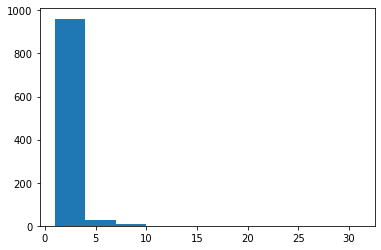

In [67]:
plt.hist(diams)

(array([0.32097528, 0.00901804, 0.00267201, 0.000334  , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.000334  ]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

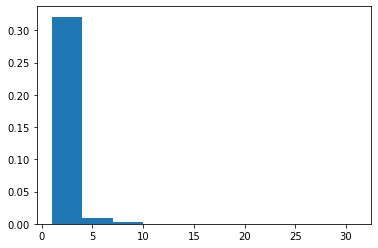

In [70]:
plt.hist(diams, density=True, stacked=True)

In [60]:
nx.shortest_path_length(g)

<generator object all_pairs_shortest_path_length at 0x7fec955f0350>

In [36]:
def short_path(graph):
    r"""
    Compute histogram of connected components diameters for a graph.
    
    :param graph: graph representation in networkx format: nx.from_numpy_matrix(A)
    :return: list of connected components diameters
    """
    diams = []
    components  = (g.subgraph(c).copy() for c in nx.connected_components(g))
    for c in components:
        diams.append(nx.average_shortest_path_length(c))
    return diams

In [37]:
path=short_path(g)

AttributeError: 'Rectangle' object has no property 'bin'

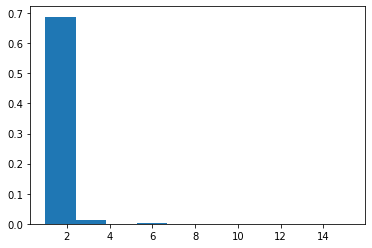

In [72]:
plt.hist(path, density=True, stacked=True,bin=1)